In [5]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models  import Sequential  
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
import matplotlib.pyplot as plt
import tensorflow as tf

In [15]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

# 전처리 할때 0~1사이의 실수로 처리할 때 더 좋은 성능을 보인다
# reshape해 input 형태를 맞춰준다 
x_train=x_train.reshape(60000,28,28,1)/255
x_test=x_test.reshape(10000,28,28,1)/255
print("x_train",x_train.shape)
print("x_test ",x_test.shape)
print("y_train",y_train.shape)
print("y_test ",y_test.shape)



x_train (60000, 28, 28, 1)
x_test  (10000, 28, 28, 1)
y_train (60000,)
y_test  (10000,)


- 필터에 적용하는 활성함수(Activation Funtion)

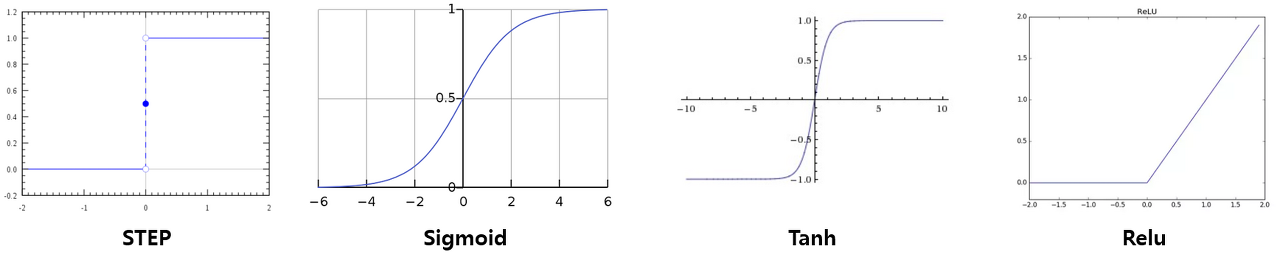



In [10]:
# 모델 생성

# Sequential 모델 하나의 입력과 하나의 출력 텐서에서 사용한다
# 다중 입력이나 다중 출력일 경우 Input layers를 사용한다
model=tf.keras.Sequential()
# Convolution Layer는 이미지의 특징들을 추출한다.(feature map으로 생성)
# input_shape : 가중치를 만들기 위해 입력의 형상을 입력한다.(처음에는 가중치 X, 가중치가 생성됨)
# padding 파라마티를 same으로 주어 입력 이미지의 크기가 작아지는 문제를 해결할 수 있다
model.add(tf.keras.layers.Conv2D(16,(3,3),padding="same",input_shape=(28,28,1)))
# BatchNormalization은 batch 단위로 입력 데이터로 평균과 분산을 하여 정규화한다
model.add(tf.keras.layers.BatchNormalization())
# Activation function 입력받은 데이터를 다음층으로 출력할지를 결정한다 
# relu Activation function을 사용하여 값이 0보다 작거나 같으면 0, 0보다 크면 값을 그대로 출력한다
model.add(tf.keras.layers.Activation('relu'))
# Dropout은 과적합을 맞기 위해 사용한다
model.add(tf.keras.layers.Dropout((0.25)))
# Covn2D은 특정범위의 특징을 추출한다면, 
# MaxPooling2D은 특성범위 내의 픽셀 중 가장 큰 값을 추출하여 특징을 추출한다
# 또, MaxPooling2D은 Covn2D layer의 출력 데이터를 입력으로 받아
# 출력 이미지의 크기를 줄이면서 중요한 데이터의 손실을 막기 위해 사용하기도 한다
model.add(tf.keras.layers.MaxPooling2D((2,2)))
 
model.add(tf.keras.layers.Conv2D(32,(3,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout((0.25)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

# Flatten은 다차원의 입력을 단순히 일차원으로 만들기 위해 사용한다
# CNN의 데이터 타입을 Fully Connected Neural Network의 형태로 변경한다
model.add(tf.keras.layers.Flatten())

# Dense의 입력 형태는 2D이고, 이전 계층의 모든 노드에 가중치를 적용한다
model.add(tf.keras.layers.Dense(units=64,input_shape=(784,)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units=64,activation="relu")) 
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units=10,activation="softmax"))

model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 16)        64        
_________________________________________________________________
activation (Activation)      (None, 28, 28, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 12, 12, 32)        1

In [11]:
# 손실함수(loss function)
# 멀티클래스 분류에서는 SparseCategoricalCrossentropy, categorical crossentropy를 사용한다
# SparseCategoricalCrossentropy는 train data의 target이 정수일때 사용하고, 
# categorical crossentropy는 train data의 target이 원-핫 형태일 때 사용한다
# MSE(mean squared error)는 회귀일 때 사용한다
# binary crossentropy는 이진 분류일때 사용한다

# 최적화(Optimization)는 손실함수를 최소화하는 파라미터를 찾는 것이다
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=["accuracy"])



In [12]:
# 모델 학습 및 검증
history=model.fit(x_train,y_train,validation_split=0.2,batch_size=32,epochs=10)

Epoch 1/10
1500/1500 [==============================] - 16s 4ms/step - loss: 1.1266 - accuracy: 0.6594 - val_loss: 0.1041 - val_accuracy: 0.9751
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2380 - accuracy: 0.9263 - val_loss: 0.0649 - val_accuracy: 0.9826
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1794 - accuracy: 0.9466 - val_loss: 0.0588 - val_accuracy: 0.9847
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1452 - accuracy: 0.9588 - val_loss: 0.0521 - val_accuracy: 0.9869
Epoch 5/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1350 - accuracy: 0.9602 - val_loss: 0.0492 - val_accuracy: 0.9878
Epoch 6/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1216 - accuracy: 0.9652 - val_loss: 0.0444 - val_accuracy: 0.9881
Epoch 7/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1051 - accuracy: 0.9711 - val_loss: 0.0494 - val_accuracy

In [13]:
# 모델 평가
test_loss,test_acc=model.evaluate(x_test,y_test,verbose=2)

313/313 - 1s - loss: 0.0355 - accuracy: 0.9897


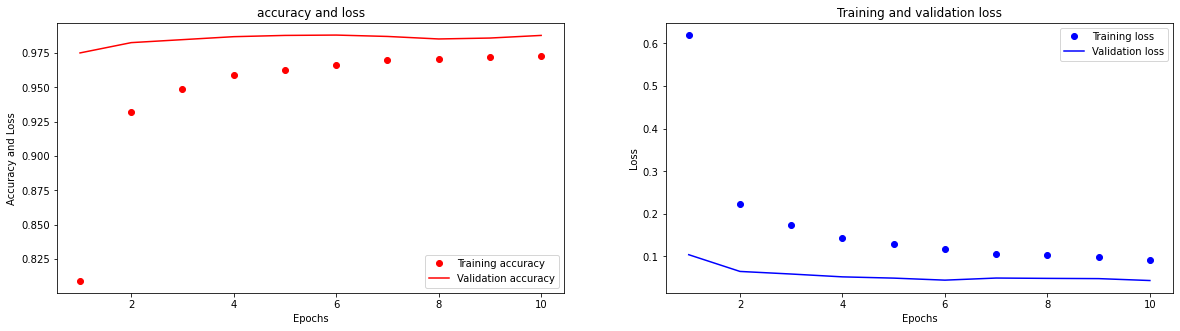

In [17]:
# Training 과 validation 의 loss, accuracy 시각화 
def show_graph(history_dict):
    accuracy = history_dict['accuracy']
    val_accuracy = history_dict['val_accuracy']
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(20,2))

    plt.subplot(121)
    plt.subplots_adjust(top=2)
    plt.plot(epochs, accuracy, 'ro', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
    plt.title('accuracy and loss')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy and Loss')
    
    plt.legend()

    plt.subplot(122)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

    plt.legend()

    plt.show()
    
show_graph(history.history)

In [ ]:
# https://keras.io/api/layers/normalization_layers/batch_normalization/
# https://m.blog.naver.com/qbxlvnf11/221901564016
# https://laboputer.github.io/machine-learning/2020/03/12/mnist995/
# http://taewan.kim/post/cnn/
# https://jarikki.tistory.com/26
# https://velog.io/@tmddn0311/mnist-classification
# https://blog.naver.com/another0430/222063836606
# https://runebook.dev/ko/docs/tensorflow/keras/metrics
# https://bskyvision.com/822 